# Alumno: Daniel Rodríguez Amézaga

# PASO 0 | Instalación, entorno y tips

In [1]:
# desde la terminal docker pull pycaret/full
# desde la terminal docker run -p 8888:8888 pycaret/full
# COPIAR DE DOCKER AL LOCAL : docker cp ./test.cvs <IDCONTAINER>:/
# DOCKER DE A LOCAL : docker cp <IDCONTAINER>:/home/jovyan/Leccion3/Leccion3.ipynb

# PASO 1 | librerías y dependencias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!python -V

Python 3.9.2


In [3]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

# PASO 2 | Importando el data set

In [ ]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# PASO 3 | Setup

In [6]:
setup(data = df,
     target="Survived",
      # Ignore_features elimina las columnas que cree innecesarias.
     ignore_features = ["Name","Ticket","PassengerId"])

,Description,Value
0,session_id,7959
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


('bc89',
 5,
 False,
 True,
 'lightgbm',
 [],
      PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 .. 

# PASO 4 | Comparando modelos

In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8218,0.8624,0.6611,0.8472,0.7392,0.6072,0.6207,3.3430
lr,Logistic Regression,0.8201,0.8626,0.7406,0.7840,0.7582,0.6156,0.6196,1.9110
lda,Linear Discriminant Analysis,0.8185,0.8576,0.7243,0.7889,0.7505,0.6093,0.6144,0.0590
lightgbm,Light Gradient Boosting Machine,0.8169,0.8629,0.7152,0.7974,0.7501,0.6066,0.6128,0.1290
ridge,Ridge Classifier,0.8137,0.0000,0.7284,0.7778,0.7476,0.6010,0.6060,0.0380
gbc,Gradient Boosting Classifier,0.8089,0.8664,0.6696,0.8091,0.7295,0.5838,0.5928,0.3020
xgboost,Extreme Gradient Boosting,0.8041,0.8597,0.7194,0.7668,0.7380,0.5823,0.5874,0.9670
ada,Ada Boost Classifier,0.7912,0.8413,0.7447,0.7248,0.7322,0.5615,0.5642,0.2460
rf,Random Forest Classifier,0.7817,0.8637,0.6652,0.7467,0.7000,0.5296,0.5349,0.4530
et,Extra Trees Classifier,0.7801,0.8370,0.6904,0.7272,0.7062,0.5309,0.5334,0.4450


# PASO 5 | Creando modelos
##### Modelo GBC

In [8]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8178,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.7937,0.8889,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.8730,0.9573,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.7742,0.8448,0.7500,0.6923,0.7200,0.5313,0.5325
4,0.7903,0.8838,0.7083,0.7391,0.7234,0.5547,0.5550
5,0.7903,0.8427,0.6667,0.7619,0.7111,0.5477,0.5507
6,0.7742,0.8575,0.6667,0.7273,0.6957,0.5167,0.5179
7,0.7742,0.8087,0.5833,0.7778,0.6667,0.5011,0.5130
8,0.8548,0.8536,0.7083,0.8947,0.7907,0.6819,0.6928


##### catboost

In [9]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.7660,0.5417,0.8667,0.6667,0.5285,0.5591
1,0.8413,0.9028,0.6667,0.8889,0.7619,0.6465,0.6615
2,0.8571,0.9455,0.7083,0.8947,0.7907,0.6845,0.6952
3,0.8065,0.8728,0.7500,0.7500,0.7500,0.5921,0.5921
4,0.8226,0.8816,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8387,0.8399,0.6667,0.8889,0.7619,0.6437,0.6589
6,0.7903,0.8399,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.8226,0.8174,0.5833,0.9333,0.7179,0.5984,0.6335
8,0.8387,0.8651,0.6667,0.8889,0.7619,0.6437,0.6589


##### lightgbm

In [10]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8248,0.6250,0.7500,0.6818,0.5132,0.5183
1,0.8413,0.8665,0.7083,0.8500,0.7727,0.6523,0.6587
2,0.8730,0.9327,0.7500,0.9000,0.8182,0.7219,0.7289
3,0.7581,0.8070,0.8333,0.6452,0.7273,0.5161,0.5298
4,0.8226,0.8553,0.7917,0.7600,0.7755,0.6289,0.6293
5,0.8065,0.8509,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.8387,0.8871,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8065,0.8766,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.8387,0.8300,0.6667,0.8889,0.7619,0.6437,0.6589


##### Random Forest

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8184,0.5417,0.7647,0.6341,0.4652,0.4804
1,0.7619,0.8643,0.6250,0.7143,0.6667,0.4828,0.4854
2,0.8413,0.9252,0.7083,0.8500,0.7727,0.6523,0.6587
3,0.7581,0.8575,0.7500,0.6667,0.7059,0.5016,0.5041
4,0.7258,0.8618,0.7083,0.6296,0.6667,0.4352,0.4373
5,0.7581,0.8300,0.6250,0.7143,0.6667,0.4781,0.4807
6,0.8065,0.8734,0.7500,0.7500,0.7500,0.5921,0.5921
7,0.7742,0.8712,0.5833,0.7778,0.6667,0.5011,0.5130
8,0.8387,0.8794,0.7083,0.8500,0.7727,0.6493,0.6558


# PASO 6 | Afinar el modelo de los 2-3 mejores

In [12]:
# Afinando la precisión para el GBC
tune_gbc_acc = tune_model(gbc,optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8077,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.8254,0.8611,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.8730,0.9434,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.7742,0.8542,0.7500,0.6923,0.7200,0.5313,0.5325
4,0.7903,0.8673,0.7500,0.7200,0.7347,0.5615,0.5618
5,0.8226,0.8586,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8387,0.8695,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8226,0.8635,0.7083,0.8095,0.7556,0.6173,0.6207
8,0.8548,0.8673,0.7083,0.8947,0.7907,0.6819,0.6928


In [13]:
# Afinando el área bajo la curva para el GBC
tune_gbc_AUC = tune_model(gbc,optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8077,0.5833,0.8750,0.7000,0.5685,0.5936
1,0.8254,0.8611,0.6667,0.8421,0.7442,0.6144,0.6240
2,0.8730,0.9434,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.7742,0.8542,0.7500,0.6923,0.7200,0.5313,0.5325
4,0.7903,0.8673,0.7500,0.7200,0.7347,0.5615,0.5618
5,0.8226,0.8586,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8387,0.8695,0.7500,0.8182,0.7826,0.6548,0.6564
7,0.8226,0.8635,0.7083,0.8095,0.7556,0.6173,0.6207
8,0.8548,0.8673,0.7083,0.8947,0.7907,0.6819,0.6928


In [14]:
# Afinando el área bajo la curva para el lightgbm
tune_lightgbm_AUC = tune_model(lightgbm,optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8355,0.4167,0.9091,0.5714,0.4365,0.5002
1,0.8095,0.8964,0.5000,1.0000,0.6667,0.5532,0.6183
2,0.8571,0.9460,0.6250,1.0000,0.7692,0.6736,0.7126
3,0.7903,0.8904,0.5000,0.9231,0.6486,0.5174,0.5668
4,0.7742,0.8986,0.4583,0.9167,0.6111,0.4758,0.5326
5,0.7903,0.8388,0.4583,1.0000,0.6286,0.5091,0.5844
6,0.8065,0.8257,0.5833,0.8750,0.7000,0.5654,0.5908
7,0.7581,0.8185,0.3750,1.0000,0.5455,0.4238,0.5185
8,0.7903,0.8311,0.4583,1.0000,0.6286,0.5091,0.5844


In [15]:
# Afinando la precisión para el lightgbm
tune_lightgbm_acc = tune_model(lightgbm,optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8355,0.4167,0.9091,0.5714,0.4365,0.5002
1,0.8095,0.8964,0.5000,1.0000,0.6667,0.5532,0.6183
2,0.8571,0.9460,0.6250,1.0000,0.7692,0.6736,0.7126
3,0.7903,0.8904,0.5000,0.9231,0.6486,0.5174,0.5668
4,0.7742,0.8986,0.4583,0.9167,0.6111,0.4758,0.5326
5,0.7903,0.8388,0.4583,1.0000,0.6286,0.5091,0.5844
6,0.8065,0.8257,0.5833,0.8750,0.7000,0.5654,0.5908
7,0.7581,0.8185,0.3750,1.0000,0.5455,0.4238,0.5185
8,0.7903,0.8311,0.4583,1.0000,0.6286,0.5091,0.5844


# PASO 7 | Visualización y gráficos

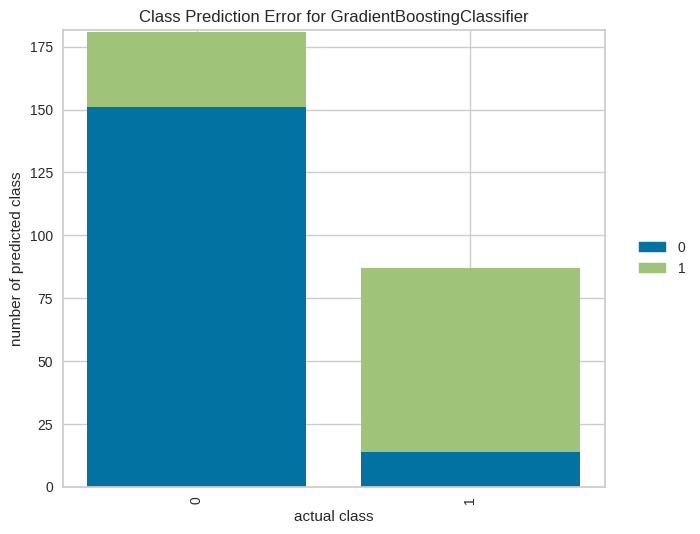

In [16]:
# el error
plot_model(tune_gbc_acc,plot='error')

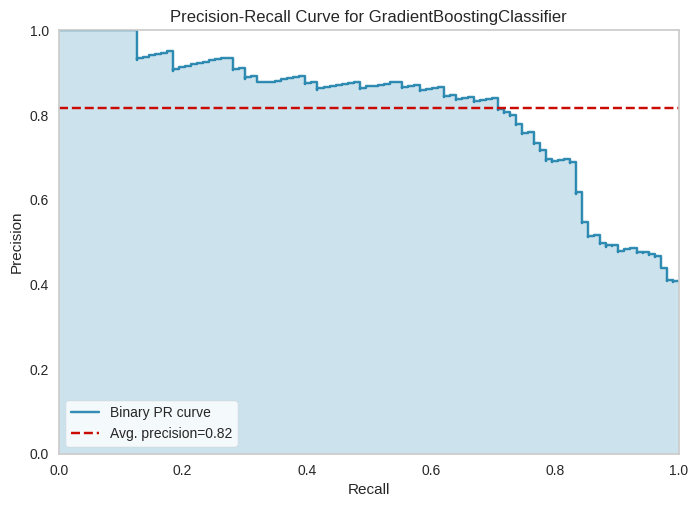

In [17]:
# precision recall
plot_model(tune_gbc_acc,plot='pr')

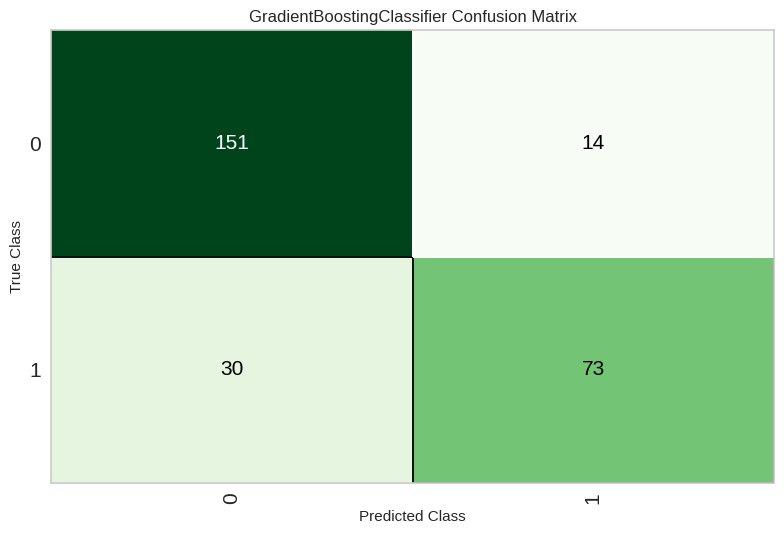

In [18]:
# precision recall
plot_model(tune_gbc_acc,plot='confusion_matrix')

In [19]:
# de todo un poco (este comando consume muchos recursos)
#evaluate_model(tune_gbc_AUC)

# PASO 8 | Predecir

In [21]:
test = pd.read_csv("test.csv")
test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
predicciones = predict_model(tune_gbc_AUC, data = test)

In [23]:
predicciones

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9170
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.6520
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.7615
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8420
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.6139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.9155
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9377
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9352
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.9155


In [24]:
predicciones_kaggle = predicciones[["PassengerId","Label"]]
predicciones_kaggle.tail(2)

,PassengerId,Label
416,1308,0
417,1309,0


In [25]:
submissions = pd.read_csv("gender_submission.csv")

In [26]:
submissions.tail(1)

,PassengerId,Survived
417,1309,0


In [28]:
submissions["PassengerId"]=predicciones_kaggle["PassengerId"]
submissions["Survived"]=predicciones_kaggle["Label"]

# PASO Final | Creamos el archivo para kaggle

In [30]:
#submissions.to_csv = pd.DataFrame({'PassengerId': submissions.PassengerId, 'Survived': submissions.Survived})
submissions.to_csv('./titanicDanielRA.csv', index=False)
#submissions.head()

# Segunda parte de la actividad (Hasta 2 puntos)
### Símplemente queremos saber tu opinión al respecto de AutoML, Queremos saber:

### Pregunta 1 - ¿Te costó esfuerzo aprender el presente tema?

##### En una escala del 0 al 10 siendo 0 nada y 10 perfecto, considero que un 7. Ya que no entiendo de AutoML nada, solo lo que aprendí en este tema. 
##### Lo más complejo para mí fue el paso 6 Afinar los modelos, aún me cuesta entender bien si siempre se hace así o depende del modelo.

### Pregunta 2 - ¿Qué te ha llamado la atención de PyCaret?

##### Lo que más llama mi atención es la capacidad de automaticación tan grande que tiene. 
##### Después de entrenar un modelo desde 0, eliminado las columnas que creo que no valen, aplicando técnicas para restaurar valores que faltan y entrenado el modelo con diferentes algoritmos, pienso que PyCaret es una herramienta imprescindible para trabajar rápido y luego perfeccionar los detalles que falten en nuestras predicciones.

### Pregunta 3 - ¿Notas que es más simple haciéndolo así que como sehizo en Fundamentos de Big Data? Si opinas diferente la respuesta no es correcta/incorrecta, siempre y cuando argumentes tu respuesta.

##### Si, pienso que es más fácil, pero también pienso que no te permite entenderlo a la perfección ya que te facilita el trabajo mucho. Se neceistan unas bases.

### Pregunta 4 - Busca más herramientas AutoML que existan y enumera alguna (simplemente queremos que te familiarices con ello, nada más).

##### AutoGluon:     
    Open-source: Yes
    Cloud-based: No, but also available in AWS SageMaker AutoPilot
    Supports: Classification, Regression
    Techniques: Compilation of pattern and practices common in the ML field
    Training framework: Scikit-learn
##### Google AutoML:
    Open-source: No
    Cloud-based: Yes, on Google GCP
    Supports: Classification, Regression
    Techniques: Automated Feature Engineering, Reinforcement learning, Transfer Neural AutoML (probably — or something similar to that)
    Training framework: TensorFlow
##### H2O AutoML:
    Open-source: Yes
    Cloud-based: No (Note that H2O Driveless AI has a different implementation)
    Supports: Classification, Regression
    Techniques: Compilation of pattern and practices common in the ML field
    Training framework: XGBoost and H2O
##### Otros:
    Azure No-Code AutoML
    DataRobot
    TPOT
##### https://santiagof.medium.com/auto-is-the-new-black-2-autogluon-h2o-automl-and-google-automl-tables-74808e4cc5ba